<a href="https://colab.research.google.com/github/bharaniakella/Deep_work/blob/main/n_hidden_units.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt

In [64]:

import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print( iris.head() )

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [65]:
# organize the data

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [66]:
def create_model(n_hidden):
  ann_hide=nn.Sequential(
      nn.Linear(4,n_hidden),
      nn.ReLU(),
      nn.Linear(n_hidden,n_hidden),
      nn.ReLU(),
      nn.Linear(n_hidden,3)
  )
  lr=0.05
  optimizer=torch.optim.SGD(ann_hide.parameters(),lr=0.05)
  loss_fun=nn.CrossEntropyLoss()
  return ann_hide,optimizer,loss_fun

In [67]:
num_epochs=150
losses=torch.zeros(num_epochs)
ongoing_acc=[]
def train_model():
  for epochi in range(num_epochs):
    yhat=ann_hide(data)
    loss=loss_fun(yhat,labels)
    losses[epochi]=loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  prediction=ann_hide(data)
  final_acc=100*torch.mean((torch.argmax(prediction,axis=1)==labels).float())
  return losses,final_acc


In [68]:
ann_hide,optimizer,loss_fun=create_model(64)
losses,final_acc=train_model()

In [69]:
all_hidden=torch.arange(1,129)

In [70]:
all_acc=[]
loss_mat=torch.zeros(len(all_hidden),num_epochs)
for hi in range(len(all_hidden)):
  ann_hide,optimizer,loss_fun=create_model(all_hidden[hi])
  losses,final_acc=train_model()
  all_acc.append(final_acc)
  loss_mat[hi,:]=losses

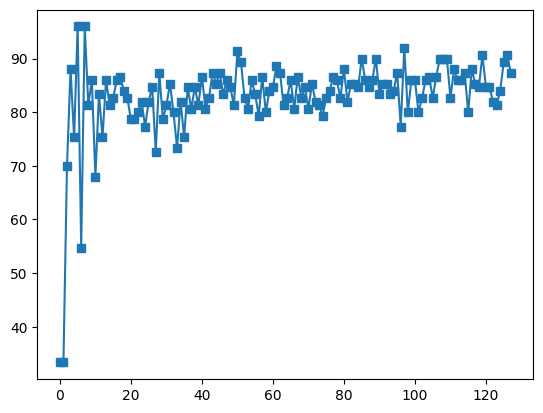

In [71]:
plt.plot(all_acc,'s-')
plt.show()

In [72]:
max(all_acc),np.argmax(all_acc)

(tensor(96.), 5)

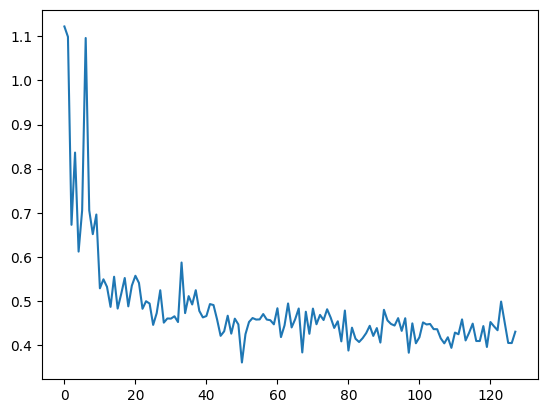

In [78]:
plt.plot(torch.mean(loss_mat.detach(),axis=1))
plt.show()